In [82]:
"""
Это у нас не Линейная штука. А регрессивная(Т.е. попытки запихнуть
дату в модель)
Что делать:
Скомуниздить реальную модель из Kaggle
Потыкать дату и визуализировать её
Разделить дб в тренировочную и тестовую
Заполнить - прописать отсутствующие числа в колонках
Скальнуть категории в 0, 1
Категоричные данные перефигарить в one-hot вектора
Логистическую регрессию сделать
Evaluate модель при помощи validation set and test set
Сохранить модель на диск и загрузить её вновь
"""

'\nЭто у нас не Линейная штука. А регрессивная(Т.е. попытки запихнуть)\nЧто делать:\nСкомуниздить реальную модель из Kaggle\nПотыкать дату и визуализировать её\nРазделить дб в тренировочную и тестовую\nЗаполнить - прописать отсутствующие числа в колонках\nСкальнуть категории в 0, 1\nКатегоричные данные перефигарить в one-hot вектора\nЛогистическую регрессию сделать\nEvaluate модель при помощи validation set and test set\nСохранить модель на диск и загрузить её вновь\n'

In [192]:
import pandas as pd
import yaml
import json
import sys
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


df = pd.read_csv("C:/Users/User/Documents/GitHub/WSRStuff/files to parse/weatherAUS.csv")

#Сначала мы проверяем типы информации в колонах 
df.dropna(subset=['RainToday','RainTomorrow'], inplace=True)

train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_val_df, val_df = train_test_split(df, test_size=0.25, random_state=42)


year = pd.to_datetime(df.Date).dt.year

train_df = df[year<2015]#На этой хуйне ты учишь модель, чтобы она хоть что-то могла понимать.
val_df = df[year == 2015]#Этой хуйней ты проверяешь точность модели, путем стука этой даты модели, однако модель иногда видит эту дату
test_df = df[year > 2015] #Тестировочная дата не должна входить в дату, на которой ты тренируешь модель. Модель увидеть её уже должна на деплое

inputs_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [157]:

#Необходимо узнать - будет ли завтра дождь по полученным данным.
#Главный параметр будет здесь - RainToday и RainTomorrow
#Испарения может быть важным фактором и количество осадков
#температура будет играть важную роль(колибания во дню, а так-же 
#минимальная и максимальна)
#Влажность крайне важная штука как и давление с облаками
#Местоположение может играть небольшую роль, ибо города прибережные 
#обычно более склонны к тому, чтобы в них шли дожди

#Данные разбиты по годам, а отсортированы по городам. 10 лет наблюдений
#над одним городом про то, какая погода сегодня будет
#Некоторые данные, конечно, могут быть и NaN, ибо потому что
#Могли ещё не начать наблюдение или просто данные приняли ислам.

"""
Собственно для тыкания модели, тебе необходимо подумать над тем,
какие данные будут полезны тебе и модели для более точного определения штук

Т.е. в этой хуйне Дата, т.к. она уникальна - будет бесполезна.
А модель используется для предсказания будет ли завтра дождь и давать
эту инфу модели... Кхем.
Ну и убирай штуки, что в таргетным приколам близки. Их следует убирать.
"""

'\nСобственно для тыкания модели, тебе необходимо подумать над тем,\nкакие данные будут полезны тебе и модели для более точного определения штук\n\nТ.е. в этой хуйне Дата, т.к. она уникальна - будет бесполезна.\nА модель используется для предсказания будет ли завтра дождь и давать\nэту инфу модели... Кхем.\nНу и убирай штуки, что в таргетным приколам близки. Их следует убирать.\n'

In [158]:
train_inputs = train_df[inputs_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[inputs_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[inputs_cols].copy()
test_targets = test_df[target_col].copy()



In [182]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

"""
Ну и конечно придется что-то сделать с отсутствующими данными в БД
Самая распространённая штука для заполнения отсутствующих данных -
imputatuon заполнение средними значениями пропавших приколов.
"""

train_inputs[numeric_cols].isna().count()
imputer = SimpleImputer(strategy = 'mean')
imputer.fit(df[numeric_cols])
list(imputer.statistics_)

train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])


In [188]:
scaler = MinMaxScaler()
scaler.fit(df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])


In [204]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoder.fit(df[categorical_cols])
encoder.categories_
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[categorical_cols] = encoder.transform(train_inputs[categorical_cols].fillna('Unknown'))

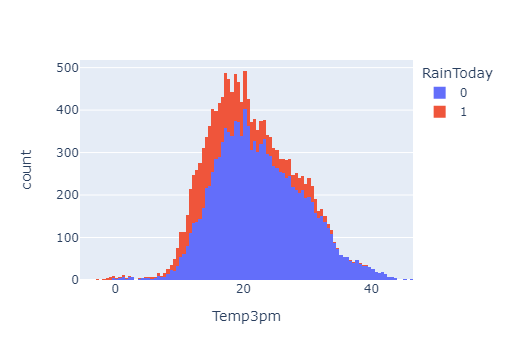

In [125]:

px.histogram(year_df, x ="Temp3pm", color="RainToday")

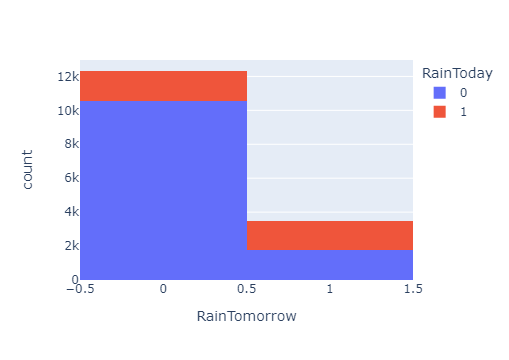

In [129]:
px.histogram(year_df, x ="RainTomorrow", color="RainToday")

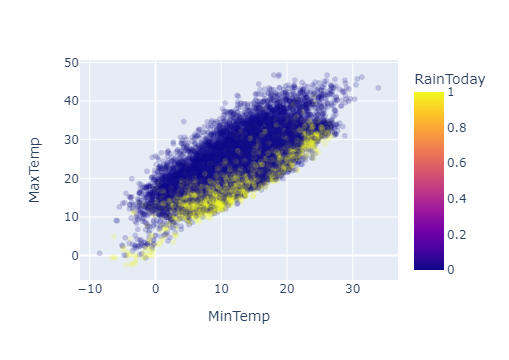

In [134]:
px.scatter(year_df, x ="MinTemp", y='MaxTemp', color="RainToday", opacity = 0.2)

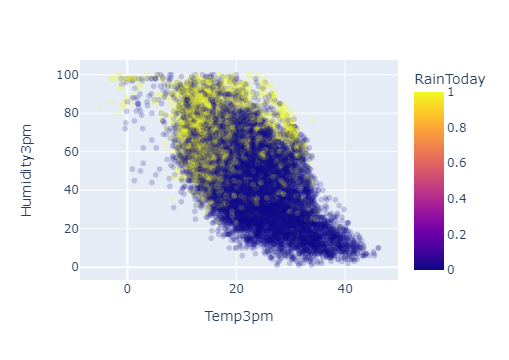

In [135]:
px.scatter(year_df, x ="Temp3pm", y='Humidity3pm', color="RainToday", opacity = 0.2)

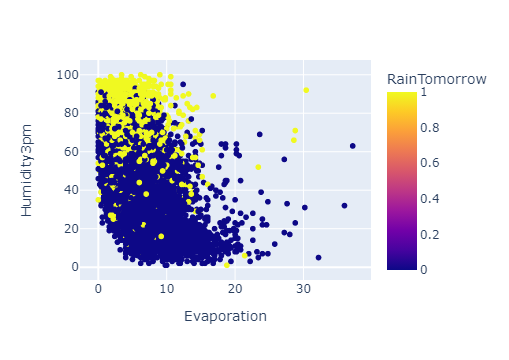

In [138]:

px.scatter(year_df, x ="Evaporation", y='Humidity3pm', color="RainTomorrow", opacity = 1)

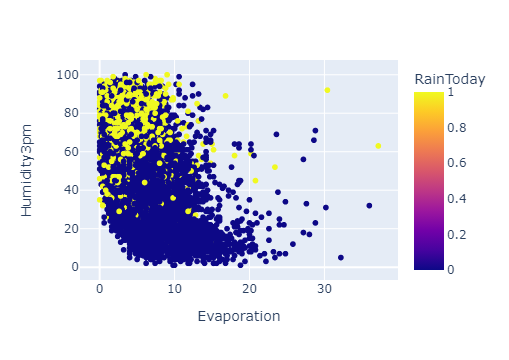

In [139]:

px.scatter(year_df, x ="Evaporation", y='Humidity3pm', color="RainToday", opacity = 1)

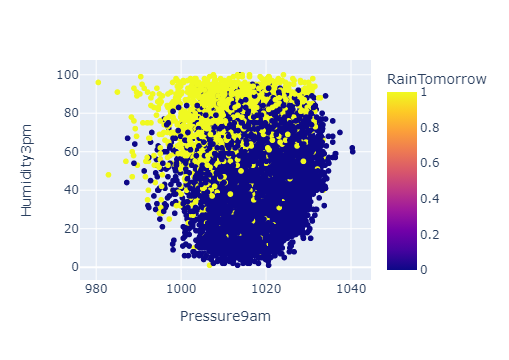

In [145]:
px.scatter(year_df, x ="Pressure9am", y='Humidity3pm', color="RainTomorrow", opacity = 1)

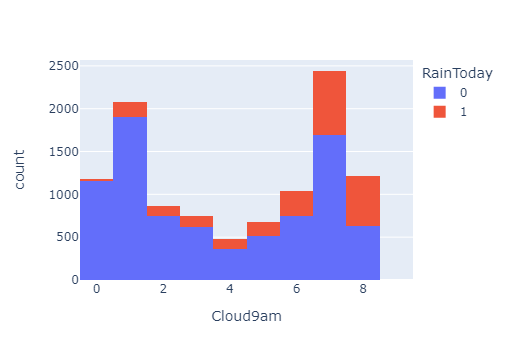

In [144]:
px.histogram(year_df, x ="Cloud9am", color="RainToday")

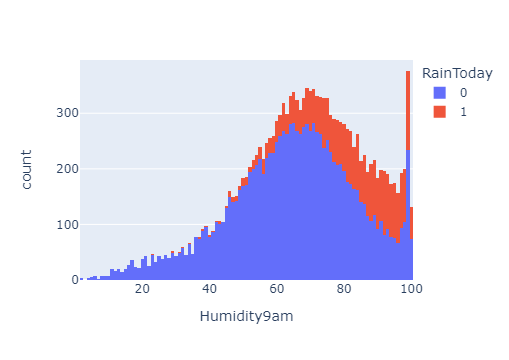

In [123]:
px.histogram(year_df, x ="Humidity9am", color="RainToday")

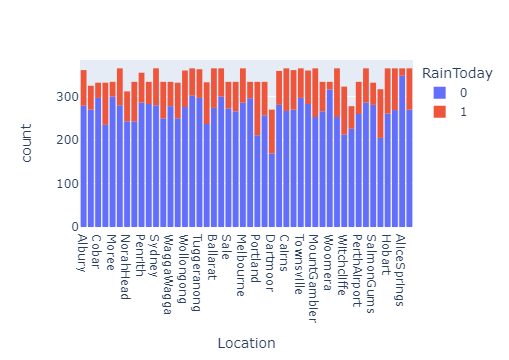

In [98]:
px.histogram(year_df, x ="Location", color="RainToday")

In [64]:
locations = list(df.Location.unique())
number_of_towns = (len(locations))
color = list(np.random.choice(range(number_of_towns), size=3))

rain_today_code = {"No":0, "Yes":1}
rained_this_day = year_df.RainToday.map(rain_today_code)

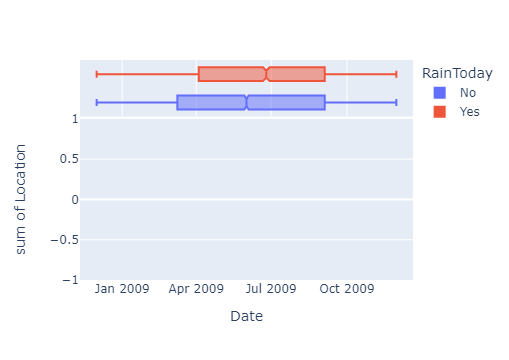

In [72]:
sns.heatmap(year_df, annot=True)

ValueError: could not convert string to float: '2008-12-01'